In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import the necessary library to load the dataset
import pandas as pd

# Reload the MNIST training dataset
mnist_file_path = 'mnist_train.csv'
mnist_data = pd.read_csv(mnist_file_path)

# Display the first few rows to understand its structure
mnist_data.head()


,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
mnist_data.columns

Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.608', '0.609', '0.610', '0.611', '0.612', '0.613', '0.614', '0.615',
       '0.616', '0.617'],
      dtype='object', length=785)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Import the necessary library to load the dataset
import pandas as pd

# Reload the MNIST training dataset
mnist_file_path = 'mnist_train.csv'
mnist_data = pd.read_csv(mnist_file_path)

# Display the first few rows to understand its structure
mnist_data.head()


,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


minist_data.describe()

In [6]:
mnist_data.columns

Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.608', '0.609', '0.610', '0.611', '0.612', '0.613', '0.614', '0.615',
       '0.616', '0.617'],
      dtype='object', length=785)

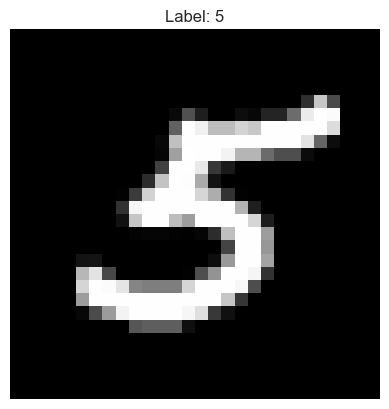

In [7]:
# Importing necessary libraries for image display
import numpy as np

# Select a random row from the dataset
random_row = mnist_data.sample(1)

# Extract the label and pixel values
label = random_row.iloc[0, 0]
pixels = random_row.iloc[0, 1:].values

# Reshape the pixel values to 28x28
image = np.reshape(pixels, (28, 28))

# Display the image with the label as the title
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

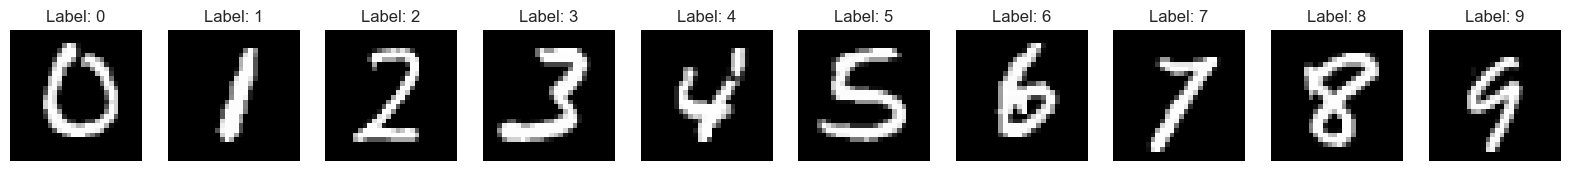

In [8]:
# Initialize a figure to display images
fig, axes = plt.subplots(1, 10, figsize=(20, 2))

# Loop through each digit and display one instance of each
for digit in range(10):
    sample_image = mnist_data[mnist_data.iloc[:, 0] == digit].sample(1)
    label = sample_image.iloc[0, 0]
    pixels = sample_image.iloc[0, 1:].values
    image = np.reshape(pixels, (28, 28))

    # Display the image
    axes[digit].imshow(image, cmap='gray')
    axes[digit].set_title(f'Label: {label}')
    axes[digit].axis('off')

plt.show()


Pour visualiser les différentes façons d'écrire un 7, afficher les 9 1ères images qui correspondent au chiffre 7 en les plaçant dans une même figure ?

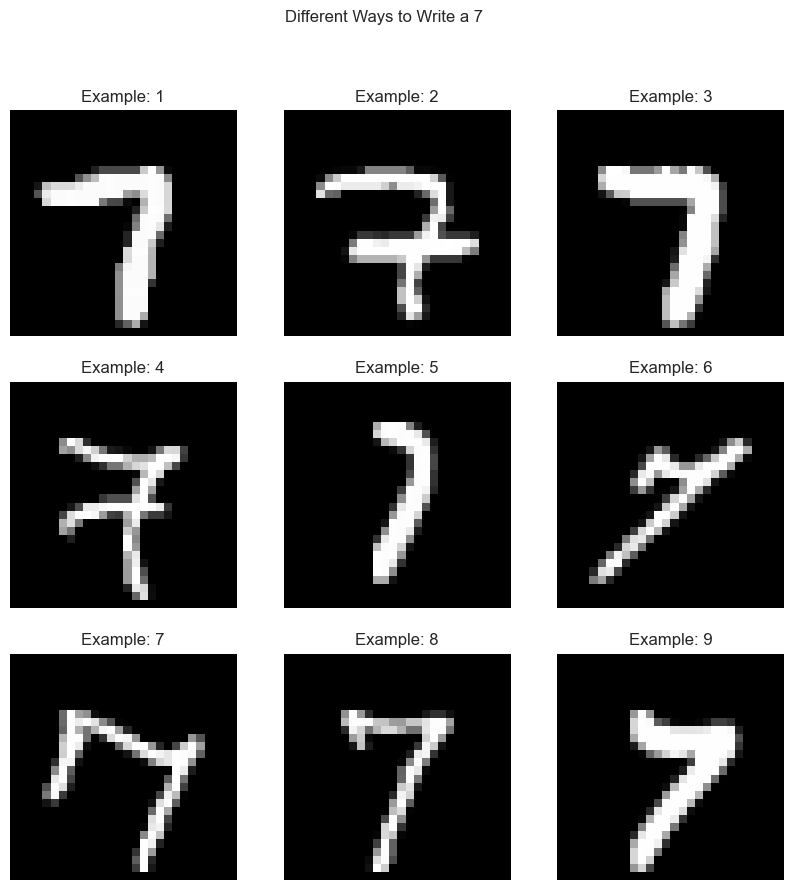

In [9]:
# Initialize a figure to display images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Select the first 9 instances of the digit 7
sample_images_seven = mnist_data[mnist_data.iloc[:, 0] == 7].sample(9).reset_index(drop=True)

# Loop through each instance and display the image
for idx, ax in enumerate(axes.flat):
    label = sample_images_seven.iloc[idx, 0]
    pixels = sample_images_seven.iloc[idx, 1:].values
    image = np.reshape(pixels, (28, 28))

    # Display the image
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Example: {idx+1}')
    ax.axis('off')

plt.suptitle('Different Ways to Write a 7')
plt.show()


Afficher le représentant "moyen" de chaque chiffre ?

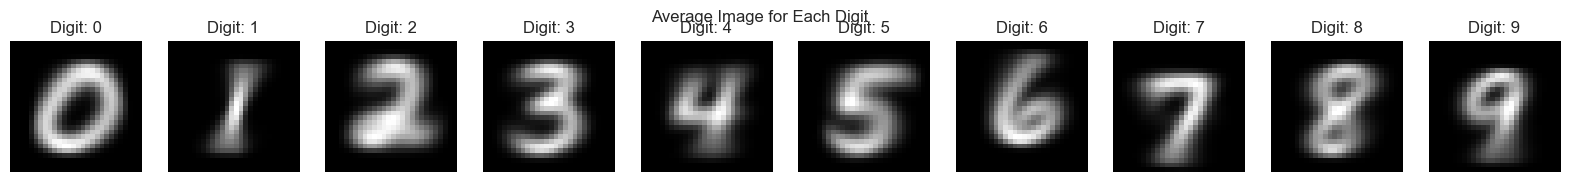

In [10]:
# Initialize a figure to display average images
fig, axes = plt.subplots(1, 10, figsize=(20, 2))

# Loop through each digit to calculate and display the average image
for digit in range(10):
    # Calculate the mean of each pixel for images of this digit
    mean_image = mnist_data[mnist_data.iloc[:, 0] == digit].iloc[:, 1:].mean(axis=0)

    # Reshape the mean image to 28x28
    mean_image = np.reshape(mean_image.values, (28, 28))

    # Display the average image
    axes[digit].imshow(mean_image, cmap='gray')
    axes[digit].set_title(f'Digit: {digit}')
    axes[digit].axis('off')

plt.suptitle('Average Image for Each Digit')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

# Due to performance considerations, we'll use a subset of the MNIST data (first 5000 samples)
mnist_subset = mnist_data.sample(n=5000, random_state=42)

# Separate features (pixels) and labels
X = mnist_subset.iloc[:, 1:]
y = mnist_subset.iloc[:, 0]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4000, 784), (1000, 784), (4000,), (1000,))

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first 5 rows of the scaled training data
pd.DataFrame(X_train_scaled).head()


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034515,-0.022502,-0.015813,-0.015813,-0.015813,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034515,-0.022502,-0.015813,-0.015813,-0.015813,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034515,-0.022502,-0.015813,-0.015813,-0.015813,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034515,-0.022502,-0.015813,-0.015813,-0.015813,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034515,-0.022502,-0.015813,-0.015813,-0.015813,0.0,0.0,0.0,0.0,0.0


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

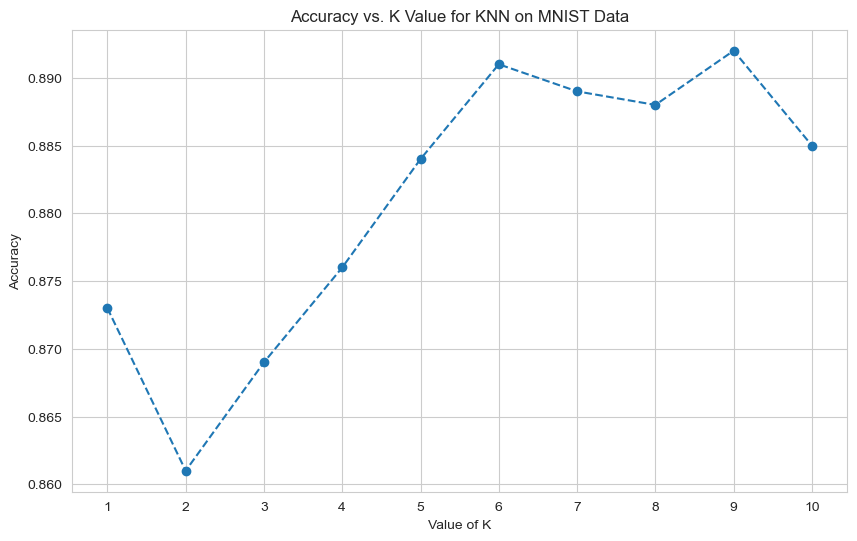

(9, 0.892)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize variables to store results
k_values = range(1, 11)  # We'll test k values from 1 to 10
accuracies = []

# Loop over various k values and record accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Value for KNN on MNIST Data')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Displaying the k value that resulted in the highest accuracy
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
best_k, best_accuracy


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the scaled training data
rf_clf.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
y_pred_rf = rf_clf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

rf_accuracy


0.934